In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"Data.csv")
df_fund = pd.read_csv(r"NCAP_Funding.csv") 
df_state = pd.read_csv(r"State_data.csv")

df.tail()

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
1627456,2024-12-10,"Worli, Mumbai - MPCB",54.71,124.42,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra
1627457,2024-12-10,"Yamunapuram, Bulandshahr - UPPCB",53.23,101.34,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh
1627458,2024-12-10,"Yerramukkapalli, Kadapa - APPCB",75.00,110.75,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh
1627459,2024-12-10,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim
1627460,2024-12-10,"Zoo Park, Hyderabad - TSPCB",72.83,176.48,NaN,Hyderabad,17.349694,78.451437,Telangana


Spatial Aggregation


In [3]:
#Question 1
df_2 = df.groupby("state")["PM2.5"].mean()
print("State: ",df_2.idxmax(),"PM2.5:",df_2.max())

State:  Delhi PM2.5: 104.1009176780069


Delhi has the highest average PM2.5 concentration across all stations and across all years.

In [4]:
#Question 2 

#Phele toh 2023 year ka data nikalo
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_2023 = df[df["Timestamp"].dt.year == 2023]

df_2023_hz = df_2023[df_2023["PM2.5"] > 300]
df_states =  df_2023_hz.groupby('state')['PM2.5'].count()
print("The state with most hazardous days is",df_states.idxmax(),"with",df_states.max(),"hazardous days")

The state with most hazardous days is Delhi with 470 hazardous days


The state with most hazardous days is delhi with 470 hazardous days


In [5]:
#Question 3 

df_variability = df_2023.groupby('state')['PM2.5'].std()
print("The state with max variability is",df_variability.idxmax(),"with std deviation as",df_variability.max())

The state with max variability is Delhi with std deviation as 82.79710576209911


In [6]:
#Question 4

df_covidperiod = df[(df["Timestamp"].dt.year == 2020) | (df["Timestamp"].dt.year == 2021)]
df_covidperiod = df_covidperiod.groupby('state')['PM2.5'].mean()
print("State: ",df_covidperiod.idxmin(),",","PM2.5: ",df_covidperiod.min())

State:  Mizoram , PM2.5:  14.323350150801287


Mizoram has the lowest average PM2.5 levels during the Covid period.

Temporal Aggregation

In [7]:
#Question 1


df_aug2020 = df[(df["Timestamp"].dt.year == 2020) & (df['Timestamp'].dt.month == 8)]
df_aug2020 = df_aug2020.groupby('station')['PM2.5'].max()
print("Station:",df_aug2020.idxmax(),'  ','PM2.5:',df_aug2020.max())

Station: Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB    PM2.5: 805.51


Station: Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB has the highest PM2.5 for August 2020

In [8]:
#Question 2


df_req = df[df["station"] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']
df_2018 = df_req[df_req['Timestamp'].dt.year == 2018]

df_sum = df_2018[(3<= df_2018['Timestamp'].dt.month) & (df_2018['Timestamp'].dt.month <= 5)]
df_notnan = df_sum[df_sum['PM2.5'].notna()]
meanpm25 = df_notnan['PM2.5'].mean()
df_sum = df_sum['PM2.5'].fillna(meanpm25)

df_mon = df_2018[(6<= df_2018['Timestamp'].dt.month) & (df_2018['Timestamp'].dt.month <= 9)]
df_notnan = df_mon[df_mon['PM2.5'].notna()]
meanpm25 = df_notnan['PM2.5'].mean()
df_mon = df_mon['PM2.5'].fillna(meanpm25)

df_win = df_2018[(df_2018['Timestamp'].dt.month == 1) | (df_2018['Timestamp'].dt.month == 2)| (df_2018['Timestamp'].dt.month == 12)]
df_notnan = df_win[df_win['PM2.5'].notna()]
meanpm25 = df_notnan['PM2.5'].mean()
df_win = df_win['PM2.5'].fillna(meanpm25)

print("Average PM2.5 of summer:",df_sum.mean())
print("Average PM2.5 of monsoon:",df_mon.mean())
print("Average PM2.5 of winter:",df_win.mean())


Average PM2.5 of summer: nan
Average PM2.5 of monsoon: 34.42519611317572
Average PM2.5 of winter: 67.49234436344778


Highest pollution occurs during the winters and one of the reasons which can lead to high pollution is the festival of Diwali which comes near winters. Cold air gets trapped under a layer of warmer air, creating a "lid" that prevents pollutants from dispersing.
This inversion layer can be as low as a few hundred feet, severely limiting the vertical mixing of air.
Pollutants accumulate in this trapped layer, leading to higher concentrations near the ground


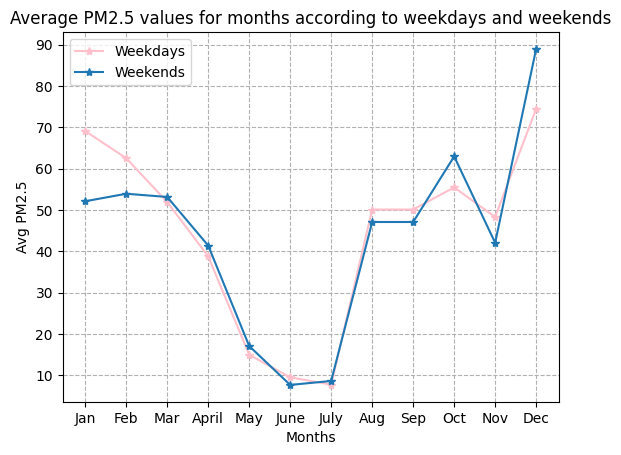

In [9]:
#Question 3 

df_2021 = df_req[df_req['Timestamp'].dt.year == 2021]


df_weekdays = df_2021[df_2021['Timestamp'].dt.weekday <= 4]
df_weekdays = df_weekdays[df_weekdays['PM2.5'].notna()]
df_weekends = df_2021[df_2021['Timestamp'].dt.weekday > 4]
df_weekends = df_weekends[df_weekends['PM2.5'].notna()]

x = ["Jan","Feb","Mar",'April','May',"June",'July','Aug','Sep','Oct','Nov','Dec']
y_weekdays = []
y_weekends = []

for i in range(1,13):
    df_temp = df_weekdays[df_weekdays['Timestamp'].dt.month == i]
    y_weekdays.append(df_temp['PM2.5'].mean())
for i in range(1,13):
    df_temp = df_weekends[df_weekends['Timestamp'].dt.month == i]
    y_weekends.append(df_temp['PM2.5'].mean())
med_weekdays = np.nanmedian(y_weekdays)
med_weekends = np.nanmedian(y_weekends)

y_weekdays = list(med_weekdays if np.isnan(i) else i for i in y_weekdays)
y_weekends = list(med_weekends if np.isnan(i) else i for i in y_weekends)


plt.plot(x,y_weekdays, marker = "*",color = "pink",label = "Weekdays")
plt.plot(x,y_weekends, marker = "*",label = "Weekends")
plt.xlabel("Months")
plt.ylabel("Avg PM2.5")
plt.title("Average PM2.5 values for months according to weekdays and weekends")
plt.grid(linestyle = '--')
plt.legend()
plt.show()








There were too many NaN values for July-August part so we had to fill these values with the median of PM2.5 over all the years.

Spatio-temporal aggregation

In [10]:
def Season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Summer"
    elif month in [6, 7, 8, 9]:
        return "Monsoon"
    else:
        return "No need"
    
df["season"] = df["Timestamp"].dt.month.apply(Season)

In [30]:
# Q1

sumavg = df[df["season"] == "Summer"].groupby("state")["PM2.5"].mean()
monavg = df[df["season"] == "Monsoon"].groupby("state")["PM2.5"].mean()
per_change = abs((monavg - sumavg) / sumavg) * 100
print(f"The percentage decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May) is\n{per_change}")

sumavg22 = df[(df["season"] == "Summer") & (df["Timestamp"].dt.year == 2022)].groupby("state")["PM2.5"].mean()
monavg22 = df[(df["season"] == "Monsoon") & (df["Timestamp"].dt.year == 2022)].groupby("state")["PM2.5"].mean()
per_change22 = (abs((monavg22 - sumavg22) / sumavg22) * 100).idxmax()
print(f"The percentage decrease in PM 2.5 levels during monsoon (June to September) compared to summer (March to May) is {per_change22}")
max = per_change.idxmax()
max

The percentage decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May) is
state
Andhra Pradesh       29.945748
Arunachal Pradesh    49.677283
Assam                52.796433
Bihar                48.831388
Chandigarh           36.141662
Chhattisgarh         39.370959
Delhi                45.636950
Gujarat              38.947405
Haryana              34.279577
Himachal Pradesh     21.146583
Jammu and Kashmir    13.465576
Jharkhand            19.323313
Karnataka            42.997896
Kerala               30.136673
Madhya Pradesh       45.972367
Maharashtra          53.547309
Manipur              59.695483
Meghalaya            55.257015
Mizoram              80.734355
Nagaland             62.095476
Odisha               50.471366
Puducherry           22.449113
Punjab               22.143482
Rajasthan            30.814302
Sikkim               64.189219
Tamil Nadu           18.588194
Telangana            44.650635
Tripura              57.360633


'Mizoram'

Mizoram has the highest percentage change while the shift in season.


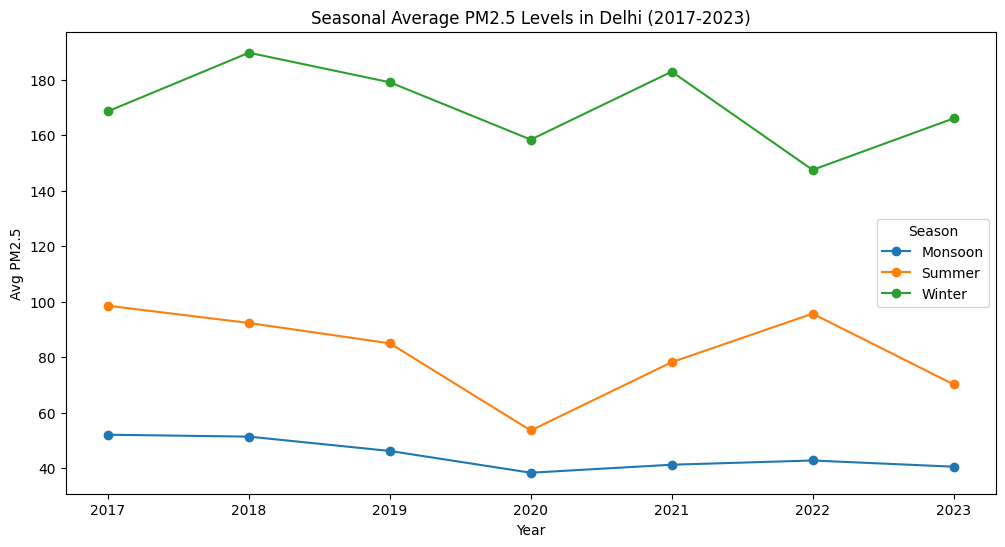

In [12]:
# Q2

avg_delhi = {}

for yr in range(2017, 2024):  
    avg_delhi[yr] = (df[(df["state"] == "Delhi") & (df["Timestamp"].dt.year == yr)].groupby("season")["PM2.5"].mean().reset_index())
combineddf = pd.concat(avg_delhi, names=["Year"]).reset_index()
combineddf = combineddf[combineddf["season"] != "No need"]
pivotdf = combineddf.pivot(index = "Year", columns = "season", values = "PM2.5")
plt.figure(figsize = (12, 6))
for season in pivotdf.columns:
    plt.plot(pivotdf.index, pivotdf[season], marker='o', label=season)
plt.xlabel("Year")
plt.ylabel("Avg PM2.5")
plt.title("Seasonal Average PM2.5 Levels in Delhi (2017-2023)")
plt.legend(title = "Season")
plt.show()

It can be inferred that Winter has the highest pollution. Monsoon has very low pollution levels

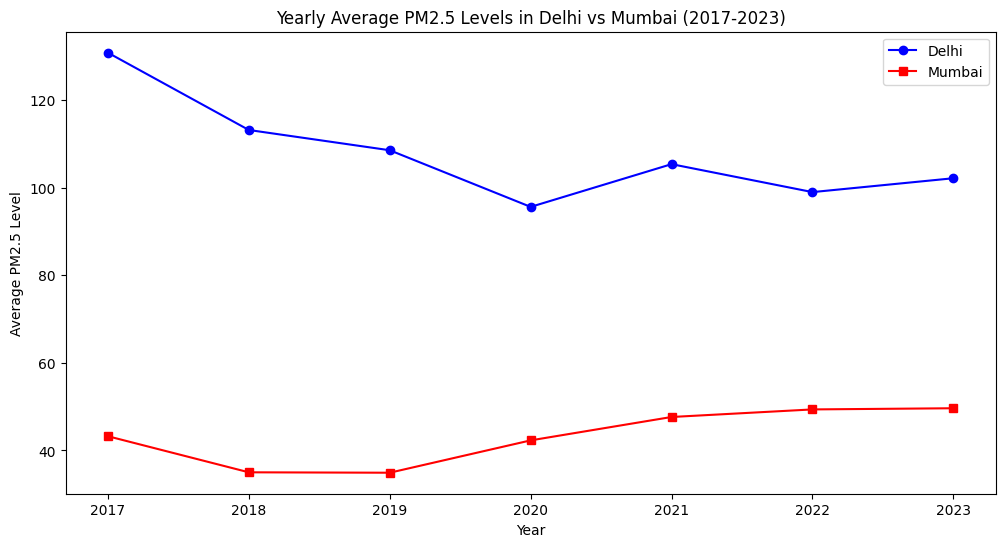

In [13]:
# Q3

mumbai = {}
delhi = {}

for yr in range(2017, 2024):  
    delhi[yr] = (df[(df["state"] == "Delhi") & (df["Timestamp"].dt.year == yr)]["PM2.5"].mean())
for yr in range(2017, 2024):  
    mumbai[yr] = (df[(df["city"] == "Mumbai") & (df["Timestamp"].dt.year == yr)]["PM2.5"].mean())

delhi = pd.DataFrame.from_dict(delhi, orient="index", columns=["PM2.5"])
mumbai = pd.DataFrame.from_dict(mumbai, orient="index", columns=["PM2.5"])

plt.figure(figsize=(12, 6))
plt.plot(delhi.index, delhi["PM2.5"], marker='o', linestyle='-', color='blue', label="Delhi")
plt.plot(mumbai.index, mumbai["PM2.5"], marker='s', linestyle='-', color='red', label="Mumbai")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level")
plt.title("Yearly Average PM2.5 Levels in Delhi vs Mumbai (2017-2023)")
plt.legend()
plt.show()

it is evident that Delhi has more fluctuations than Mumbai as the distance of the points from the linear regression is greater for Delhi, this can also be backed up by the fact that the graph of Mumbai changes its concavity at only 1 point whereas that of Delhi does so at 4 points.

Population Based

In [14]:
df_state = df_state.rename(columns= {"State":"state"})

In [15]:
# Question 1
nomonitorstation = df.groupby("state")["station"].nunique().reset_index()
nomonitorstation.columns = ["state", "no of stations"]

new = nomonitorstation.merge(df_state, on = "state")
new["rel"] = new["no of stations"] / new["Population"]
relative = new["state"].iloc[new["rel"].idxmax()]
print(f"The state in India has the highest number of monitoring stations relative to its population is\n{relative}")

The state in India has the highest number of monitoring stations relative to its population is
Chandigarh


The state in India has the highest number of monitoring stations relative to its population is
Chandigarh

Text(0.5, 1.0, 'Top 5 Most Polluted States by PM2.5 Exposure in 2023')

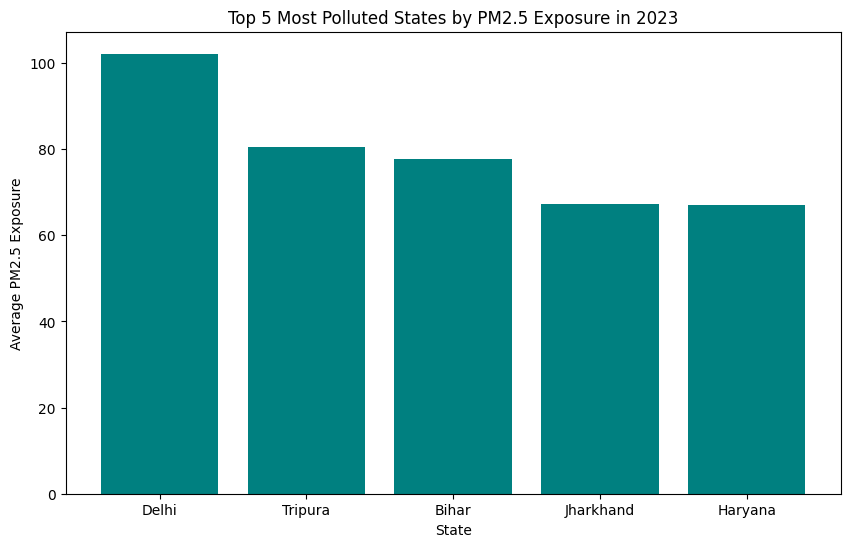

In [16]:
# Question 2

top5 = df[df["Timestamp"].dt.year == 2023].groupby("state")["PM2.5"].mean().nlargest(5).reset_index()
top5.columns = ["state", "avg pm2.5"]
top_5 = top5.merge(df_state[df_state["state"].isin(top5["state"])].reset_index(), on = "state")
top_5 = top_5.drop(columns=["index"])

plt.figure(figsize=(10, 6))
plt.bar(top_5["state"], top_5["avg pm2.5"], color="teal")
plt.xlabel("State")
plt.ylabel("Average PM2.5 Exposure")
plt.title("Top 5 Most Polluted States by PM2.5 Exposure in 2023")

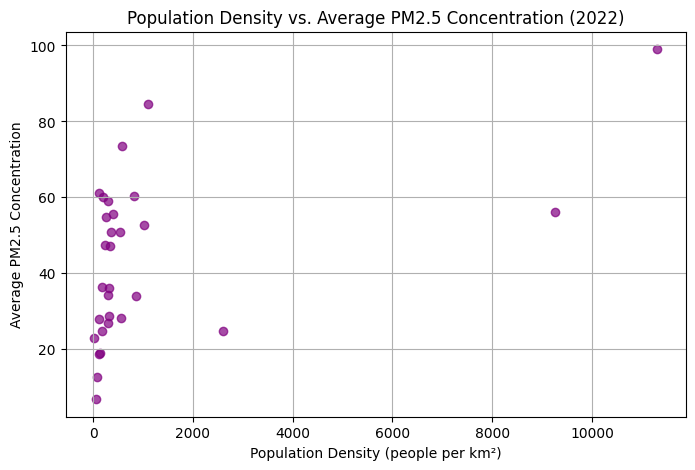

In [17]:
# Question 3


df["Timestamp"] = pd.to_datetime(df["Timestamp"])

df_2022 = df[df["Timestamp"].dt.year == 2022]

pm25_per_state = df_2022.groupby("state")["PM2.5"].mean().reset_index()
pm25_per_state.columns = ["state", "Avg_PM2.5"]

df_state["Population_Density"] = df_state["Population"] / df_state["Area (km2)"]


density_pm25_df = pm25_per_state.merge(df_state[["state", "Population_Density"]], on="state")

plt.figure(figsize=(8, 5))
plt.scatter(density_pm25_df["Population_Density"], density_pm25_df["Avg_PM2.5"], color="purple", alpha=0.7)
plt.xlabel("Population Density (people per km²)")
plt.ylabel("Average PM2.5 Concentration")
plt.title("Population Density vs. Average PM2.5 Concentration (2022)")
plt.grid(True)

m, b = np.polyfit(density_pm25_df["Population_Density"], density_pm25_df["Avg_PM2.5"], 1)
plt.plot(density_pm25_df["Population_Density"], m * density_pm25_df["Population_Density"] + b, color="red")

plt.show()


The diversity in the graph infers that both of the quantities are independent of each other.

Area Based


Chandigarh


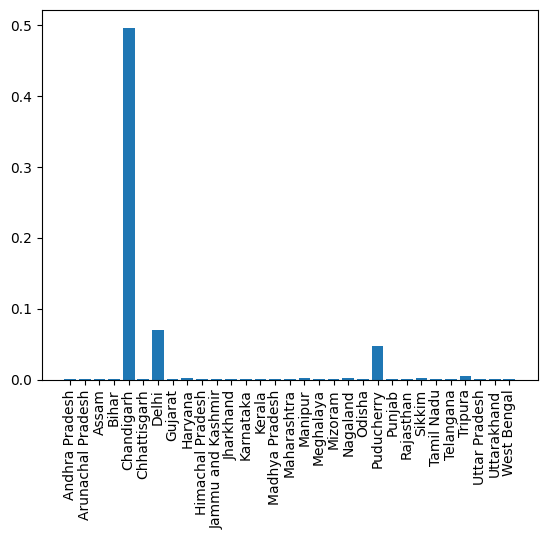

In [18]:
#Question 1
group_statemean = pd.DataFrame(df.groupby("state")["PM2.5"].mean()).reset_index()
group_statemean = group_statemean.rename(columns={"PM2.5": "PM2.5mean"})
merged_df = group_statemean.merge(df_state, on="state", how="inner") 
merged_df["Perkm"] = merged_df["PM2.5mean"] / merged_df["Area (km2)"]
print(merged_df.loc[merged_df["Perkm"].idxmax(), "state"]) 


plt.bar(merged_df["state"],merged_df["Perkm"])
plt.xticks(rotation=90)
plt.show()

Chandigarh has the highest PM2.5 concentration per square kilometer.

Delhi


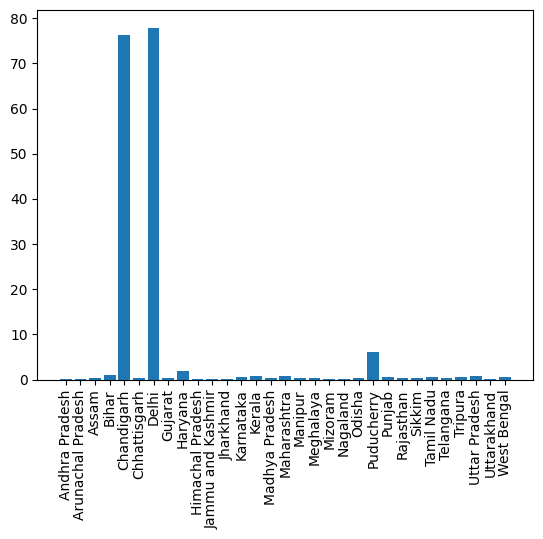

In [19]:
#Question 2
group_stations = pd.DataFrame(df.groupby("state").size())
group_stations=group_stations.reset_index()
group_stations = group_stations.rename(columns={0: "size"})
merged_df = group_stations.merge(df_state, on="state", how="inner") 
merged_df["Stationdensity"] = merged_df["size"] / merged_df["Area (km2)"]
print(merged_df.loc[merged_df["Stationdensity"].idxmax(), "state"])
plt.bar(merged_df["state"],merged_df["Stationdensity"])
plt.xticks(rotation=90)
plt.show()

Delhi has the highest density of monitoring stations relative to its area.

In [20]:
#Question 3
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df_2021 = df[df["Timestamp"].dt.year == 2021]
group = pd.DataFrame(df_2021.groupby("state")["PM2.5"].mean()).reset_index()
x = (pd.DataFrame(group.loc[(group["state"] == "Maharashtra") | (group["state"] == "Madhya Pradesh"), ["state", "PM2.5"]]))
merged_df = x.merge(df_state, on="state", how="inner")
merged_df["Population"] = merged_df["Population"]/merged_df["Area (km2)"]
merged_df = merged_df.drop(columns=["Area (km2)"])
merged_df = merged_df.rename(columns = {"Population" : "Population Density"})
merged_df

,state,PM2.5,Population Density,Population_Density
0,Madhya Pradesh,47.095952,235.608557,235.608557
1,Maharashtra,46.440044,365.192023,365.192023


The population density of Madhya Pradesh is lower than Maharashtra however the stats for the PM2.5 concentration is reversed. Ideally both should have the same pattern but here it is reversed. So, this implies that pollution of a place doesn't depend on the population density.

Funding Based

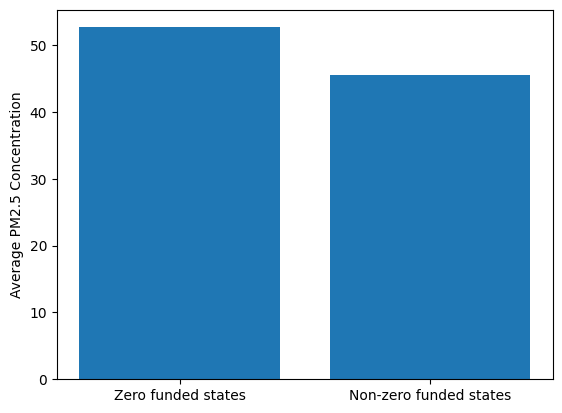

In [21]:
# Question 1

df_fund.replace("-","0",inplace = True)
df_fund['Amount released during FY 2021-22'] = df_fund['Amount released during FY 2021-22'].astype(float)
df_fund['Amount released during FY 2020-21'] = df_fund['Amount released during FY 2020-21'].astype(float)
df_fund['Amount released during FY 2019-20'] = df_fund['Amount released during FY 2019-20'].astype(float)
group_statemean = pd.DataFrame(df.groupby("state")["PM2.5"].mean()).reset_index().rename(columns = {'state': 'State'})
fund2021 = pd.DataFrame(df_fund.groupby("State")["Amount released during FY 2021-22"].sum()).reset_index()
fund2021 = fund2021.merge(group_statemean,on = "State",how = "inner")
x = [(fund2021.loc[fund2021["Amount released during FY 2021-22"] != 0.00])["PM2.5"].mean(), (fund2021.loc[fund2021["Amount released during FY 2021-22"] == 0.00])["PM2.5"].mean()]
y = ["Zero funded states", "Non-zero funded states"]
plt.bar(y,x)
plt.ylabel("Average PM2.5 Concentration")
plt.show()

Here, Funded states have lower pollution stats than Non- funded states as expected logically since the funding will help in reducing the pollution of the funded states.

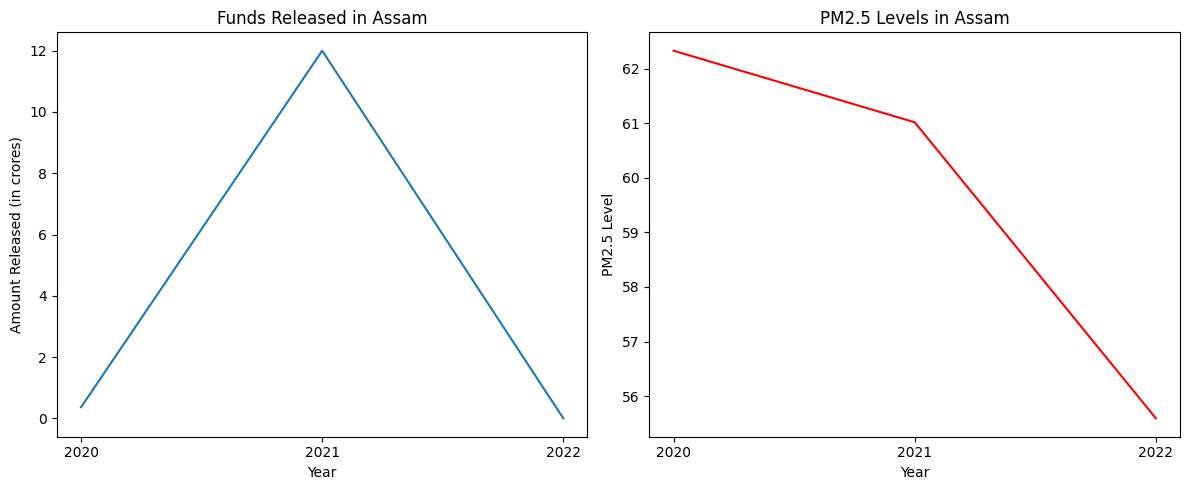

In [22]:
#Question 2 
totalfunds = pd.DataFrame(df_fund.groupby("State")[["Amount released during FY 2019-20","Amount released during FY 2020-21","Amount released during FY 2021-22"	]].sum()).reset_index()
assamfunds = (totalfunds[totalfunds["State"] == "Assam"])
assamfunds = assamfunds.T
assamfunds.columns = assamfunds.iloc[0]
assamfunds = assamfunds[1:].reset_index()
assam_main = df[df["state"] == "Assam"]
assam_main = assam_main.copy()

assam_main["Timestamp"] = pd.to_datetime(assam_main["Timestamp"])

assam_main['Year'] = assam_main['Timestamp'].dt.year
assam_yearwise = pd.DataFrame(assam_main.groupby("Year")["PM2.5"].mean()).reset_index()
assam_yearwise = assam_yearwise[(assam_yearwise["Year"] >= 2020) & (assam_yearwise["Year"] <= 2022)].reset_index(drop = True)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(assam_yearwise["Year"], assamfunds["Assam"])
axes[0].set_title("Funds Released in Assam")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Amount Released (in crores)")
axes[0].set_xticks(assam_yearwise["Year"])

axes[1].plot(assam_yearwise["Year"], assam_yearwise["PM2.5"], color='r')
axes[1].set_title("PM2.5 Levels in Assam")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("PM2.5 Level")
axes[1].set_xticks(assam_yearwise["Year"])

plt.tight_layout()
plt.show()

Yes, the fundings for the year 2021 helped in reducing the PM2.5 concentrations significantly.

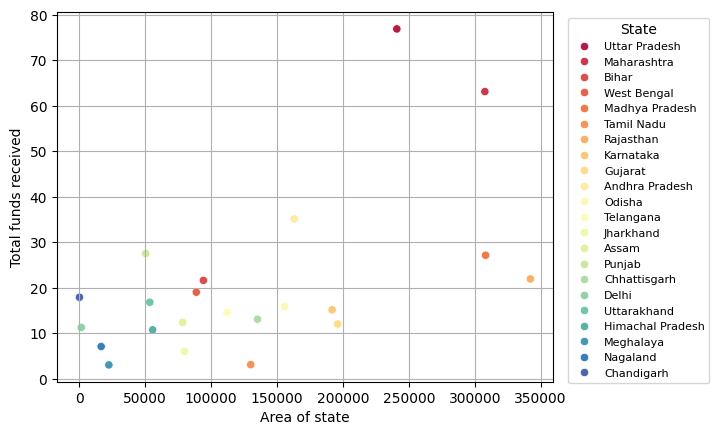

In [23]:
#Question 3 
df_state = df_state.rename(columns={"state": "State"})
req_data = pd.merge(df_state, df_fund.groupby('State')['Total fund released'].sum(), on = 'State')
sns.scatterplot(data = req_data, x = 'Area (km2)', y = 'Total fund released', hue = 'State', palette = 'Spectral')
plt.legend(title='State', bbox_to_anchor=(1.02, 1), fontsize = '8')
plt.grid(True)
plt.xlabel("Area of state")
plt.ylabel("Total funds received")
plt.show()

In [24]:
assam_main = df[df["state"] == "Assam"]
assam_main = assam_main.copy()
assam_main["Timestamp"] = pd.to_datetime(assam_main["Timestamp"])

assam_main['Year'] = assam_main['Timestamp'].dt.year
assam_yearwise = pd.DataFrame(assam_main.groupby("Year")["PM2.5"].mean()).reset_index()
assam_yearwise = assam_yearwise[(assam_yearwise["Year"] >= 2020) & (assam_yearwise["Year"] <= 2022)].reset_index(drop = True)
assam_yearwise

,Year,PM2.5
0,2020,62.329410
1,2021,61.017780
2,2022,55.592354


Miscelleneous Questions


In [25]:
#Question 1 
df_2023 = df[df['Timestamp'].dt.year == 2023]
df_2023_avgPM25 = df_2023.groupby('state')['PM2.5'].mean()
df_2023 = df_2023[df_2023['state'] ==  df_2023_avgPM25.idxmax()]
df_2023 = df_2023.groupby(df['Timestamp'].dt.date)['PM2.5'].mean()
hzdays = df_2023[df_2023 > 300]
hzdays_count = hzdays.count()
percent = (hzdays_count/365)*100
print("The percentage of hazardous days witth 300 ug is",percent,'%')

The percentage of hazardous days witth 300 ug is 3.0136986301369864 %


The percentage of hazardous days witth 300 ug is 3.0136986301369864 % for Delhi(the most polluted city)

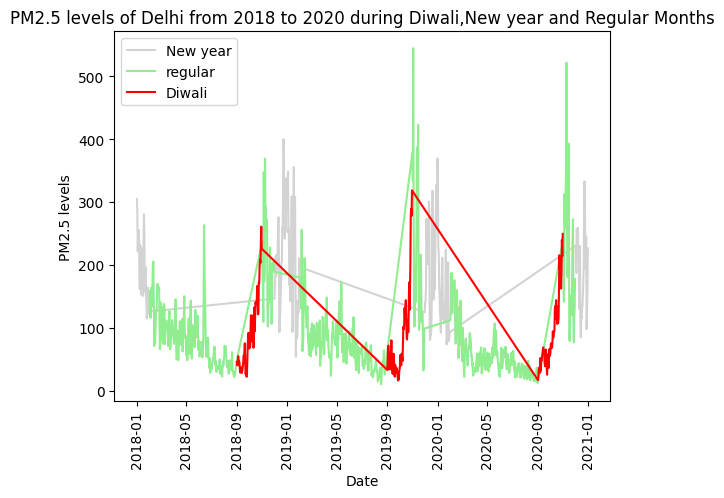

In [26]:
#Question 2
df_2018_2020 = df[(df['Timestamp'].dt.year == 2018)|(df['Timestamp'].dt.year == 2019)|(df['Timestamp'].dt.year == 2020)]
df_delhi_18_20 = df_2018_2020[df_2018_2020['state'] == 'Delhi']
df_delhi_18_20 = pd.DataFrame(df_delhi_18_20.groupby(df['Timestamp'].dt.date)['PM2.5'].mean()).reset_index()
df_delhi_18_20['Timestamp'] = pd.to_datetime(df_delhi_18_20['Timestamp'])

df_diw = df_delhi_18_20[(df_delhi_18_20['Timestamp'].dt.month == 9) | (df_delhi_18_20['Timestamp'].dt.month == 10)]
df_ny = df_delhi_18_20[(df_delhi_18_20['Timestamp'].dt.month == 1) | (df_delhi_18_20['Timestamp'].dt.month == 12)]
df_reg = df_delhi_18_20[(df_delhi_18_20['Timestamp'].dt.month != 9) & (df_delhi_18_20['Timestamp'].dt.month != 10)&(df_delhi_18_20['Timestamp'].dt.month != 1) & (df_delhi_18_20['Timestamp'].dt.month != 12)]


x_1 = list(df_diw['Timestamp'])
y_1 = list(df_diw['PM2.5'])

x_2 = list(df_ny['Timestamp'])
y_2 = list(df_ny['PM2.5'])

x_3 = list(df_reg['Timestamp'])
y_3 = list(df_reg['PM2.5'])


plt.plot(x_2,y_2,label = 'New year',color = 'lightgrey')
plt.plot(x_3,y_3,label = 'regular',color = 'lightgreen')
plt.plot(x_1,y_1,label = 'Diwali',color = 'Red')
plt.xticks(rotation = 90)
plt.legend()
plt.title('PM2.5 levels of Delhi from 2018 to 2020 during Diwali,New year and Regular Months')
plt.xlabel('Date')
plt.ylabel('PM2.5 levels')


plt.show()


Yes, there is a significant increase in the pollution during the days of Diwali. This can be correlated to the bursting of crackers.

The state with max funding in the year 2020 is:  Andhra Pradesh


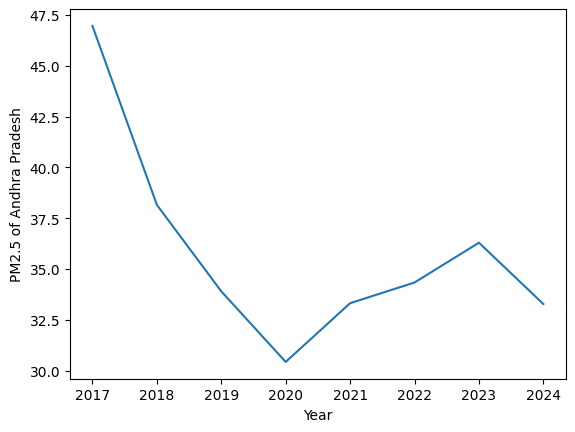

In [27]:
#Question 3
groupfund = pd.DataFrame(df_fund.groupby("State")["Amount released during FY 2020-21"].sum()).reset_index()
result = groupfund.loc[groupfund['Amount released during FY 2020-21'].idxmax(), 'State']
print("The state with max funding in the year 2020 is: ",result)
AP_main = df[df["state"] == "Andhra Pradesh"]
AP_main = AP_main.copy()
AP_main["Timestamp"] = pd.to_datetime(AP_main["Timestamp"])

AP_main['Year'] = AP_main['Timestamp'].dt.year
AP_yearwise = pd.DataFrame(AP_main.groupby("Year")["PM2.5"].mean()).reset_index()
plt.plot(AP_yearwise["Year"],AP_yearwise["PM2.5"])
plt.xlabel("Year")
plt.ylabel("PM2.5 of Andhra Pradesh")
plt.show()

The state with max funding in the year 2020 is:  Andhra Pradesh

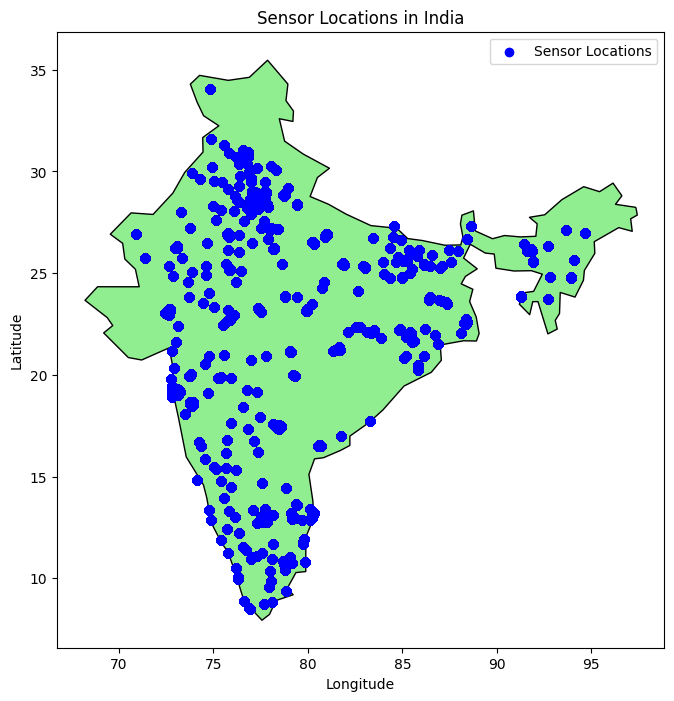

In [28]:
#Question 4 
import geopandas as gpd
df_sensors = df.dropna(subset=["latitude", "longitude"])
world = gpd.read_file("https://github.com/nvkelso/natural-earth-vector/raw/master/geojson/ne_110m_admin_0_countries.geojson")
india_map = world[world["NAME"] == "India"]
fig, ax = plt.subplots(figsize=(10, 8))
india_map.plot(ax=ax, color="lightgreen", edgecolor="black")  
ax.scatter(df_sensors["longitude"], df_sensors["latitude"], 
           color='blue', marker='o', label='Sensor Locations')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Sensor Locations in India")
ax.legend()
plt.show()

Finding Something New


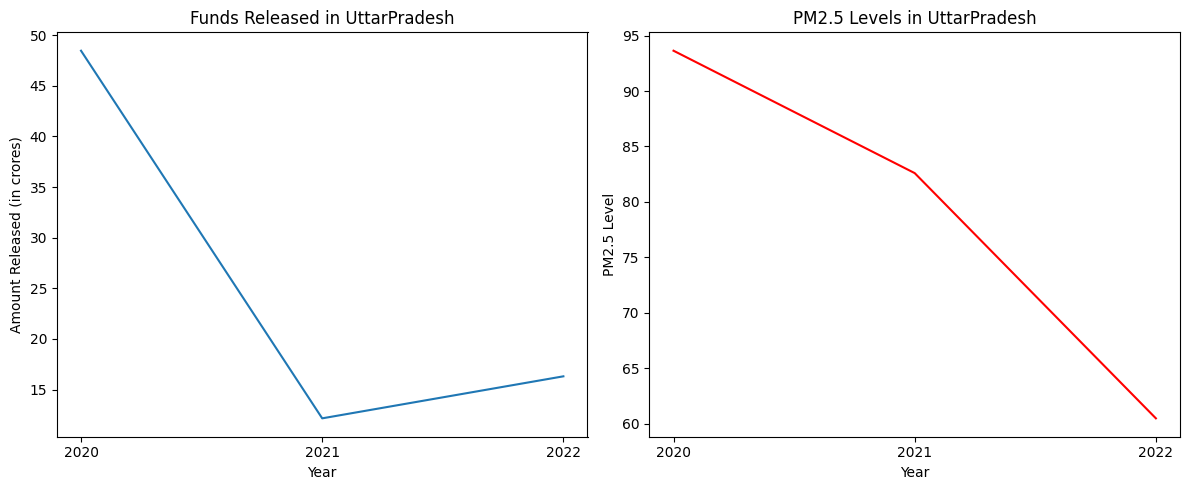

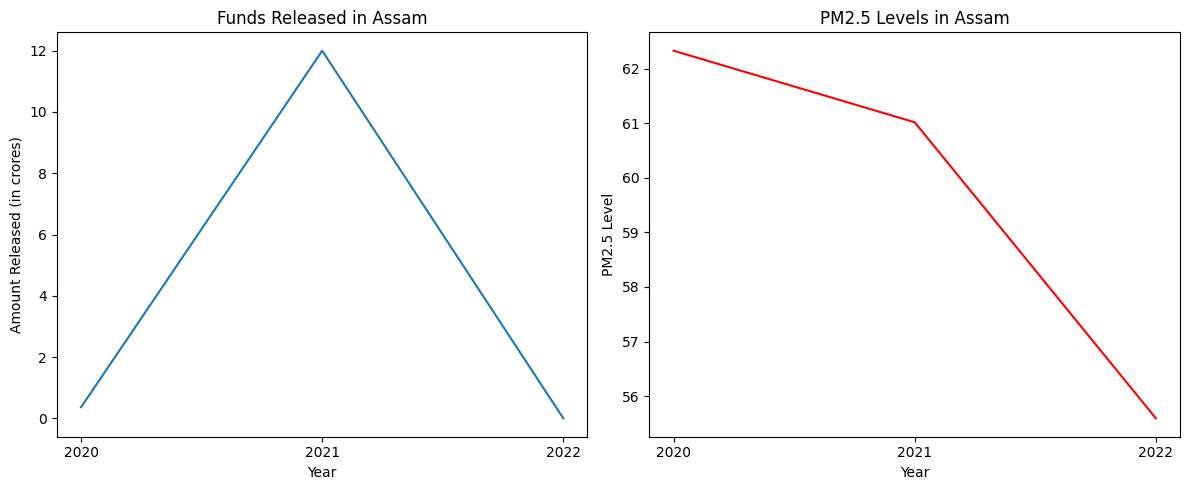

In [29]:
totalfunds = pd.DataFrame(df_fund.groupby("State")[["Amount released during FY 2019-20","Amount released during FY 2020-21","Amount released during FY 2021-22"	]].sum()).reset_index()
UttarPradeshfunds = (totalfunds[totalfunds["State"] == "Uttar Pradesh"])
UttarPradeshfunds = UttarPradeshfunds.T
UttarPradeshfunds.columns = UttarPradeshfunds.iloc[0]
UttarPradeshfunds = UttarPradeshfunds[1:].reset_index()
UttarPradesh_main = df[df["state"] == "Uttar Pradesh"]
UttarPradesh_main = UttarPradesh_main.copy()

UttarPradesh_main["Timestamp"] = pd.to_datetime(UttarPradesh_main["Timestamp"])

UttarPradesh_main['Year'] = UttarPradesh_main['Timestamp'].dt.year
UttarPradesh_yearwise = pd.DataFrame(UttarPradesh_main.groupby("Year")["PM2.5"].mean()).reset_index()
UttarPradesh_yearwise = UttarPradesh_yearwise[(UttarPradesh_yearwise["Year"] >= 2020) & (UttarPradesh_yearwise["Year"] <= 2022)].reset_index(drop = True)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(UttarPradesh_yearwise["Year"], UttarPradeshfunds["Uttar Pradesh"])
axes[0].set_title("Funds Released in UttarPradesh")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Amount Released (in crores)")
axes[0].set_xticks(UttarPradesh_yearwise["Year"])

axes[1].plot(UttarPradesh_yearwise["Year"], UttarPradesh_yearwise["PM2.5"], color='r')
axes[1].set_title("PM2.5 Levels in UttarPradesh")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("PM2.5 Level")
axes[1].set_xticks(UttarPradesh_yearwise["Year"])

plt.tight_layout()
plt.show()
totalfunds = pd.DataFrame(df_fund.groupby("State")[["Amount released during FY 2019-20","Amount released during FY 2020-21","Amount released during FY 2021-22"	]].sum()).reset_index()
Assamfunds = (totalfunds[totalfunds["State"] == "Assam"])
Assamfunds = Assamfunds.T
Assamfunds.columns = Assamfunds.iloc[0]
Assamfunds = Assamfunds[1:].reset_index()
Assam_main = df[df["state"] == "Assam"]
Assam_main = Assam_main.copy()

Assam_main["Timestamp"] = pd.to_datetime(Assam_main["Timestamp"])

Assam_main['Year'] = Assam_main['Timestamp'].dt.year
Assam_yearwise = pd.DataFrame(Assam_main.groupby("Year")["PM2.5"].mean()).reset_index()
Assam_yearwise = Assam_yearwise[(Assam_yearwise["Year"] >= 2020) & (Assam_yearwise["Year"] <= 2022)].reset_index(drop = True)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(Assam_yearwise["Year"], Assamfunds["Assam"])
axes[0].set_title("Funds Released in Assam")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Amount Released (in crores)")
axes[0].set_xticks(Assam_yearwise["Year"])

axes[1].plot(Assam_yearwise["Year"], Assam_yearwise["PM2.5"], color='r')
axes[1].set_title("PM2.5 Levels in Assam")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("PM2.5 Level")
axes[1].set_xticks(Assam_yearwise["Year"])

plt.tight_layout()
plt.show()




In the year 2019-2020, UP received a huge amount of funding and in the following year they reduced the pollution to some extent the funding for UP was reduced and the funding for North- eastern states was increased for the year 2020-2021.So, in the year 2022 These states utilized fund efficiently and decreased the pollution. The policy makers can use such transfer of fund distribution so that each section of the country is benefitted equally.